# Getting your data ready for analysis

---
## Goals of this lesson

### Students will learn:

1. How to open various data types in Python
2. How to check for missing or problematic data and address issues.
3. How to filter, rearrange and shape data in preparation for analysis.

---
## A quick introduction to Python scientific computing modules

As a programming languge, Python can do quite a lot. For example, it is an extremely popular choice for GUI and web-based application development (Reddit, Google, Facebook), databases (Spotify, Netflix), and scientific computing (NASA, for example, but also us!).

One reason that Python is so widely used is due to its extensive library of third-party modules. You can think of a module as a collection of functions. In order to access those functions, you need to `import` the module into your script or computing environment.

Before importing some modules, let's review the most important modules for scientific computing, some (but not all) of which we'll be using today.

#### Data Analysis
- NumPy: The fundamental package for scientific computing in Python. Numpy provides Python with most of the functionality of MATLAB.
- SciPy: Provides many user-friendly and efficient numerical routines such as routines for numerical integration, interpolation, optimization, linear algebra and statistics.
- Pandas: Provides high-performance, easy-to-use data structures and data analysis tools. Pandas provides Python with most of the functionality of R.

#### Data Visualization
- Matplotlib: Python 2D plotting library which produces publication quality figures. The pyplot module provides a MATLAB-like interface and is what most people use.
- Seaborn: A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

We'll now import a few of these modules using their standard abbreviations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set(style="ticks",font="Arial",font_scale=2)

In order to call one of the functions belonging to a particular module, you can use the `.` syntax. For example, numpy has a `mean()` function which will compute the arithmetic mean across an axis. If we wanted to call that function, we would simply write:

In [2]:
np.mean([2,4,6])

4.0

Now that you're familiar with the basics of modules in Python, let's go ahead and move on to some data cleaning.

---
## Getting your data into Python
---

### Entering data directly
In some cases, you may want to enter data directly into Python. This is easy with a small number of cases.


In [3]:
data = {
        'score': [20, 16, 35, 19],
        'name':  ["Monica","Michelle","Paul","Ellen"],
        'year':  [2, 5, 2, 1]
       }

In [4]:
dataframe = pd.DataFrame(data)
dataframe

,score,name,year
0,20,Monica,2
1,16,Michelle,5
2,35,Paul,2
3,19,Ellen,1


---
### Reading data into Python

It's also easy to introduce errors this way, and with a lot of data it would get tedious. Most of the time, you'll be reading data from an external file (.txt or .csv), or opening up an existing dataset in Python. Once you find the location of your files, what you do next will depend on the file format.

#### The `os` module

In order to get information about files that are available to us to read into Python, we will be working with the `os` module. This module provides a way to interface with the operating system we are running Python on (Windows, Mac, or Linux). Let's start by first loading this module:

In [5]:
import os

#### What's your working directory and where is the file you want?

Your working directory is the directory (and subdirectories) where the files you're working with are stored. You can check your working directory using `os.getcwd()`

In [6]:
os.getcwd()

'/Users/jonathan/Desktop/cu-psych-comp-tutorial/Python/dataCleaning'

You can access a list of everything (all files and directories) within your working directory using the `os.listdir()` function...


In [7]:
os.listdir()

['CleaningChallenge.ipynb',
 '.DS_Store',
 'Study1_Followup.csv',
 'Study2_Subjects.csv',
 'Study1_clean.csv',
 'DataCleaning_code.ipynb',
 '.ipynb_checkpoints',
 'Study1.csv',
 'CleaningChallenge_key.ipynb',
 'README_Study2.txt',
 'Study2_Trials.csv']

...as well as in the "Files" tab on the lefthand side of the jupyter lab window.

#### What kind of file do you have?

For .txt, .csv, or any kind of delimited (such as tab-delimited) file, you can use the pandas function `read_table()`:

In [8]:
#help(pd.read_table)

In [9]:
mydata = pd.read_table("Study1.csv", sep=",")

If you know you have a csv file, another common option is `read_csv`, which has a default comma seperator.

Remember, all of these commands can have arguments that will help Python make sense of your data. To find out what arguments are possible, you can use the `help()` function like we did above to look at what `read_table()` does.

To do this, just put whatever command you would like to learn about inside of `help()` (e.g. `help(pd.read_table)`). Remember that for functions associated with a particular module you will need to tell python which module they come from using the `.` syntax.

You can always also Google a function to quickly find this information.

### Inspecting your data

Now you have data, time to get some results! But wait! Are you sure this data is ok? Doing some basic steps to inspect your data now can save you lots of headaches later, and Python makes it really easy.

Start by checking that you have the expected number of rows and columns in your data frame. You can do this by by asking Python:

In [10]:
# get the number of rows and columns
mydata.shape

(50, 9)

In [11]:
# get the names of columns
mydata.columns

Index(['ID', 'Age', 'Sex', 'Condition', 'Personality', 'T1', 'T2', 'T3', 'T4'], dtype='object')

In [12]:
# take a peak at the first few rows
mydata.head()

,ID,Age,Sex,Condition,Personality,T1,T2,T3,T4
0,1,21.0,Female,0,67,5,2,3,1
1,2,22.0,Female,1,63,4,1,5,2
2,3,24.0,Male,1,58,6,2,6,2
3,4,22.0,Female,1,51,2,3,6,5
4,5,19.0,Female,0,49,7,6,5,2


### Rename a variable

Now that we've loaded our data into Python and have made sure it makes sense, we can now start manipulating and cleaning it.

Look back at your data frame. What is the fifth variable? What does that even mean? Luckily, this is your study and you know that it's a personality questionnaire measuring neuroticism. Let's fix that name and make it more intuitive:

In [13]:
mydata = mydata.rename({'Personality':'Neuroticism'}, axis="columns")
mydata.head()

,ID,Age,Sex,Condition,Neuroticism,T1,T2,T3,T4
0,1,21.0,Female,0,67,5,2,3,1
1,2,22.0,Female,1,63,4,1,5,2
2,3,24.0,Male,1,58,6,2,6,2
3,4,22.0,Female,1,51,2,3,6,5
4,5,19.0,Female,0,49,7,6,5,2


We can also rename multiple variables at once:

In [14]:
mydata = mydata.rename({'T1':'Day1',
                        'T2':'Day2',
                        'T3':'Day3',
                        'T4':'Day4'}, axis="columns")
mydata.head()

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
0,1,21.0,Female,0,67,5,2,3,1
1,2,22.0,Female,1,63,4,1,5,2
2,3,24.0,Male,1,58,6,2,6,2
3,4,22.0,Female,1,51,2,3,6,5
4,5,19.0,Female,0,49,7,6,5,2


### Indexing a dataframe

Sometimes you might want to look at only a subset of the columns in a dataframe (for example, when there are many variables). Doing this with a pandas dataframe is relatively straightforward:

In [15]:
# indexing a single column
ids = mydata[['ID']]
ids.head()

,ID
0,1
1,2
2,3
3,4
4,5


In [16]:
# indexing multiple columns
mydata_subset = mydata[['ID','Age','Neuroticism']]
mydata_subset.head()

,ID,Age,Neuroticism
0,1,21.0,67
1,2,22.0,63
2,3,24.0,58
3,4,22.0,51
4,5,19.0,49


### Check for missing data
One problem you may have is missing data. Sometimes this is something you already know about, but you should check your data frame anyway to make sure nothing got missed in a data entry error. For small datasets, you can do this visually, but for larger ones you can ask Python.

In [17]:
mydata.isnull()
#mydata.isnull().values.any()

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In this case, the missing value is the Age value in row 38. You know you have this info somewhere on a paper form, so you go dig it up and want to replace it.


In [18]:
# Verify that this row contains the missing data
mydata.loc[mydata["ID"]==39]

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
38,39,NaN,Female,1,53,1,3,1,3


In [19]:
# Replace row, column with the value 30
mydata.loc[mydata["ID"]==39, "Age"] = 30

In [20]:
# Verify that the replacement worked
mydata.loc[mydata["ID"]==39]

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4
38,39,30.0,Female,1,53,1,3,1,3


### Check for correct values

Let's take a look at the `Sex` variable:

In [21]:
mydata['Sex'].head()

0    Female
1    Female
2      Male
3    Female
4    Female
Name: Sex, dtype: object

It looks like there are two categories here, but let's double check. We can use the `unique()` function to list all of the unique values in a column:

In [22]:
mydata["Sex"].unique()

array(['Female', 'Male', 'Femle'], dtype=object)

Here we see another data entry problem. At least one of the rows has a third category label that should really be another case of "Female". Let's replace this label using the `replace()` function:

In [23]:
mydata["Sex"] = mydata["Sex"].replace('Femle', 'Female')

In [24]:
# Verify that the replacement worked
mydata["Sex"].unique()

array(['Female', 'Male'], dtype=object)

Now let's look at some of the continuous variables. You can also look at these by indexing them individually, but sometimes it's easier to visualize. The `hist()` function, which creates histograms, is good here.

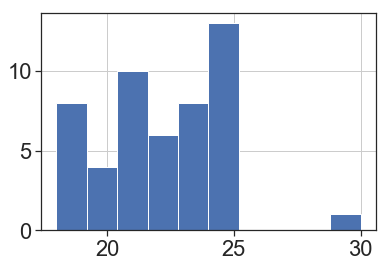

In [25]:
mydata["Age"].hist();

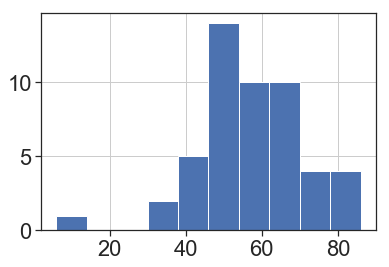

In [26]:
mydata["Neuroticism"].hist();

Looks like we have a potential outlier on the neuroticism score. This could be an entry error, but it could also be a real value that just happens to be really low. This is why data inspection is so important for later analysis -- now you know that value is there, it's up to you to decide how to deal with it.

### Filtering data 
Let's say we have decided a prori to exclude outliers 3SD above or below the mean. We will first define these boundaries:

In [27]:
upper = np.mean(mydata["Neuroticism"]) + 3*np.std(mydata["Neuroticism"])
lower = np.mean(mydata["Neuroticism"]) - 3*np.std(mydata["Neuroticism"])

We can now use conditional indexing to exclude all rows with a Neuroticism score above or below these values:

In [28]:
mydata = mydata[(mydata["Neuroticism"] > lower) & (mydata["Neuroticism"] < upper)]

This line says: return only the Neuroticism values greater than the `lower` boundary and less than the `upper` boundary and then save it in the `mydata` variable

In [29]:
# Verify that we excluded 1 outlier
mydata.shape

(49, 9)

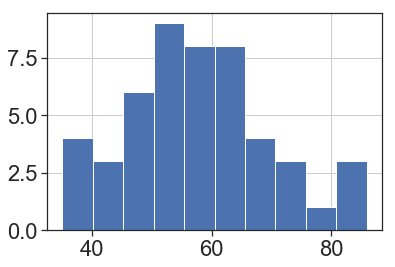

In [30]:
mydata["Neuroticism"].hist();

---
## Getting ready for analysis

Now that we've gone through and cleaned up the problems, you can think ahead to how you'll want to use this data.

### Recoding variables

Sometimes we want to treat categorical variables as factors, but sometimes we want to pretend they're numeric (as in a regression, when binary variables can be coded as 0 and 1). Right now, Condition is coded as a binary numeric variable, but that's not very informative, so you'd rather have the values be descriptive. Here, the function `replace()` is again useful:

In [31]:
mydata['ConditionF'] = mydata['Condition'].replace([0,1], ['Control','Treatment'])

In [32]:
# Verify that your variable is now recoded as you'd like
mydata[['Condition','ConditionF']].head()

,Condition,ConditionF
0,0,Control
1,1,Treatment
2,1,Treatment
3,1,Treatment
4,0,Control


### Calculating new variables

You may also want to recalculate or rescale some variables. For example, we can turn Neuroticism into a Z score, or calculate an average response across the four time points.

To compute a Z score, we can use the `zscore` function from the `scipy.stats` module:

In [33]:
from scipy.stats import zscore

mydata['NeuroticismZ'] = zscore(mydata['Neuroticism'])

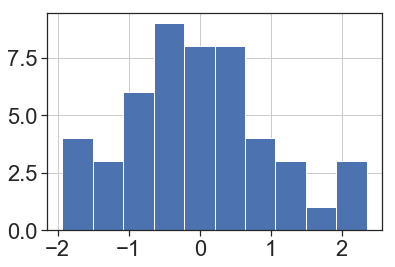

In [34]:
mydata['NeuroticismZ'].hist();

To calculate the means across each day, we can use the `mean` function from pandas on a dataframe that has been indexed to include only data from the four days:

In [35]:
mydata['DayMean'] = mydata[['Day1','Day2','Day3','Day4']].mean(axis="columns")

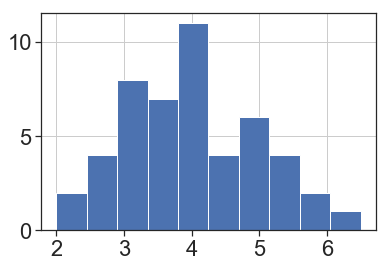

In [36]:
mydata['DayMean'].hist();

### Combining data from multiple sources

Sometimes, data might be spread across multiple files, and you'll want to combine those for your analysis. For example, maybe this study had a follow-up survey on Day 30. Scores from that survey were entered into another spreadsheet, which only has the subject ID and that score. We want to include that score into our data.

In [37]:
# first load the followup dataset
mydata2 = pd.read_csv("Study1_Followup.csv")

We can use the function `merge()` to combine the two dataframes. To make sure the data matches up, we use the `on` argument to specify that IDs should match. That way even if the data is in a different order you will get scores matched together correctly.

In [38]:
mydata = mydata.merge(mydata2,on="ID")
mydata.head()

,ID,Age,Sex,Condition,Neuroticism,Day1,Day2,Day3,Day4,ConditionF,NeuroticismZ,DayMean,Day30
0,1,21.0,Female,0,67,5,2,3,1,Control,0.754583,2.75,6
1,2,22.0,Female,1,63,4,1,5,2,Treatment,0.418450,3.00,6
2,3,24.0,Male,1,58,6,2,6,2,Treatment,-0.001715,4.00,6
3,4,22.0,Female,1,51,2,3,6,5,Treatment,-0.589946,4.00,3
4,5,19.0,Female,0,49,7,6,5,2,Control,-0.758013,5.00,6


### Shaping data

Finally, you may want to change the layout of your data. Right now, our data frame is in "wide" format, which means that each row is a subject, and each observation gets its own column. For some analyses, you'll need to use "long" format, where each row is an observation, and columns specify things like time and ID to differentiate the observations. For this, we can use the `melt()` function in pandas:

In [39]:
value_cols = ["Day1","Day2","Day3","Day4"] # columns we would like to convert to a single "long" column
id_cols = list(mydata.columns) # columns we would like to stay in the same "wide" format
for i in value_cols:
    id_cols.remove(i)

In [40]:
mydata_Long = pd.melt(mydata,id_vars=id_cols,var_name="Time",value_vars=value_cols,value_name="Score")
mydata_Long.head()

,ID,Age,Sex,Condition,Neuroticism,ConditionF,NeuroticismZ,DayMean,Day30,Time,Score
0,1,21.0,Female,0,67,Control,0.754583,2.75,6,Day1,5
1,2,22.0,Female,1,63,Treatment,0.418450,3.00,6,Day1,4
2,3,24.0,Male,1,58,Treatment,-0.001715,4.00,6,Day1,6
3,4,22.0,Female,1,51,Treatment,-0.589946,4.00,3,Day1,2
4,5,19.0,Female,0,49,Control,-0.758013,5.00,6,Day1,7


We can go back in the other direction by using the `pivot_table()` function in pandas:

In [41]:
mydata_Wide = mydata_Long.pivot_table(values="Score", index=id_cols, columns='Time').reset_index()
mydata_Wide.columns.name = None
mydata_Wide.head()

,ID,Age,Sex,Condition,Neuroticism,ConditionF,NeuroticismZ,DayMean,Day30,Day1,Day2,Day3,Day4
0,1,21.0,Female,0,67,Control,0.754583,2.75,6,5,2,3,1
1,2,22.0,Female,1,63,Treatment,0.418450,3.00,6,4,1,5,2
2,3,24.0,Male,1,58,Treatment,-0.001715,4.00,6,6,2,6,2
3,4,22.0,Female,1,51,Treatment,-0.589946,4.00,3,2,3,6,5
4,5,19.0,Female,0,49,Control,-0.758013,5.00,6,7,6,5,2


---
## Saving your work

Once you've created a data cleaning script like this one, you'll have a record of all the edits you've made on the raw data, and you can recreate your cleaned data just by running the script again. However, it's often easier to save your cleaned data as its own file **(never overwrite the raw data)**, so when you come back to do analysis you don't have to bother with all the cleaning steps. 

You can always save data frames as a .csv for easy sharing and viewing outside of R.

In [42]:
# write data to a .csv
mydata.to_csv("Study1_clean.csv")

---
## Future Directions

Congratulations! You've now cleaned some data in Python and you're ready to start working with your data. This tutorial only went over some basic cleaning steps. As you work with your own data, you may find yourself needing other tools. 
